In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import re
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.matcher import Matcher
from textacy.spacier import utils as spacy_utils
import warnings
warnings.filterwarnings('ignore')

2023-05-12 03:06:37.167466: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#!pip install textacy
#!python -m spacy download en_core_web_lg

In [3]:
spacy.__version__

'3.4.4'

In [4]:
path = "https://raw.githubusercontent.com/Kamil128/Training_DS_NLP/main/all_djt_tweets.csv"
tweets = pd.read_csv(path)

In [5]:
tweets.head()

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18


In [6]:
tweets.shape

(328053, 8)

In [7]:
tweet = tweets.loc[0, 'text']
print(tweet)

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!


In [8]:
nlp = spacy.load('en_core_web_lg')
doc = nlp(tweet)
print(f'type : {type(doc)}')
doc

type : <class 'spacy.tokens.doc.Doc'>


Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!

In [9]:
text_doc = []
for token in doc:
    data = {
        'text': token.text,
        'lemma': token.lemma_,
        'POS': token.pos_,
        'TAG': token.tag_,
        'dep': token.dep_,
        'shape': token.shape_,
        'is_alpha': token.is_alpha,
        'is_stop': token.is_stop,
    }
    text_doc.append(data)

pd.DataFrame(text_doc)

,text,lemma,POS,TAG,dep,shape,is_alpha,is_stop
0,Over,over,ADP,IN,quantmod,Xxxx,True,True
1,90,90,NUM,CD,nummod,dd,False,False
2,%,%,NOUN,NN,compound,%,False,False
3,approval,approval,NOUN,NN,compound,xxxx,True,False
4,rating,rating,NOUN,NN,ROOT,xxxx,True,False
5,for,for,ADP,IN,prep,xxx,True,True
6,your,your,PRON,PRP$,poss,xxxx,True,True
7,all,all,DET,DT,det,xxx,True,True
8,time,time,NOUN,NN,npadvmod,xxxx,True,False
9,favorite,favorite,ADJ,JJ,pobj,xxxx,True,False


# NER

In [10]:
doc

Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please!

In [11]:
def explain_text_entity(text: str):
    doc = nlp(text)
    for ent in doc.ents:
        print(f"""Entity: "{ent}" - LABEL - {ent.label_} - {spacy.explain(ent.label_)}""")

In [12]:
explain_text_entity(tweets.loc[0, 'text'])

Entity: "Over 90%" - LABEL - PERCENT - Percentage, including "%"
Entity: "the Republican Party" - LABEL - ORG - Companies, agencies, institutions, etc.
Entity: "52%" - LABEL - PERCENT - Percentage, including "%"
Entity: "the Fake News Media" - LABEL - ORG - Companies, agencies, institutions, etc.


In [13]:
explain_text_entity(tweets.loc[10, 'text'])

Entity: "Mexico" - LABEL - GPE - Countries, cities, states
Entity: "the hour" - LABEL - TIME - Times smaller than a day
Entity: "Mexico" - LABEL - GPE - Countries, cities, states


In [14]:
def display_ent(text: str):
    doc = nlp(text)
    spacy.displacy.render(doc, style='ent', jupyter=True)

In [15]:
display_ent(tweets.loc[0, 'text'])

In [16]:
display_ent(tweets.loc[2, 'text'])

In [17]:
display_ent(tweets.loc[420, 'text'])

# Redact names

In [18]:
def redact_names(text):
    doc = nlp(text)
    redacted_sentece = []

    with doc.retokenize() as retokenize:
        for ent in doc.ents:
            retokenize.merge(ent)

    for token in doc:
        if token.ent_type_ == "PERSON":
            redacted_sentece.append("[REDACTED]")
        else:
            redacted_sentece.append(token.text)
    return " ".join(redacted_sentece)

In [19]:
redact_names(tweets.loc[420, 'text'])

'Today is the day to vote for [REDACTED] . Will be great for Georgia , full Endorsement ! https://t.co/yPND2bJ219'

In [20]:
tweet = tweets.loc[420, 'text']
display_ent(tweet)

r_tweet = redact_names(tweet)
display_ent(r_tweet)

# Noun chunks

In [21]:
for s in doc.sents:
    print(s)

Over 90% approval rating for your all time favorite (I hope)
President within the Republican Party and 52% overall.
This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible.
Look at the real villains please!


In [22]:
example_text = tweets.loc[0, 'text']
doc = nlp(example_text)
display_ent(example_text)

In [23]:
for idx, sentence in enumerate(doc.sents):
    for noun in sentence.noun_chunks:
        print(f"sentence: {idx + 1} has noun chunk: {noun}")

sentence: 1 has noun chunk: Over 90% approval rating
sentence: 1 has noun chunk: I
sentence: 2 has noun chunk: President
sentence: 2 has noun chunk: the Republican Party
sentence: 2 has noun chunk: 52%
sentence: 3 has noun chunk: This
sentence: 3 has noun chunk: all
sentence: 3 has noun chunk: the made up stories
sentence: 3 has noun chunk: the Fake News Media
sentence: 3 has noun chunk: me
sentence: 4 has noun chunk: the real villains


# Semantic analysis

In [24]:
tweets

,Unnamed: 0,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,0,Twitter for iPhone,Over 90% approval rating for your all time fav...,Mon Aug 27 00:39:38 +0000 2018,27040,106838.0,False,1.033877e+18
1,1,Twitter for iPhone,“Mainstream Media tries to rewrite history to ...,Sun Aug 26 22:01:33 +0000 2018,21346,76682.0,False,1.033837e+18
2,2,Twitter for iPhone,Fantastic numbers on consumer spending release...,Sun Aug 26 14:31:06 +0000 2018,18960,87334.0,False,1.033724e+18
3,3,Twitter for iPhone,"...And it will get, as I have always said, muc...",Sun Aug 26 14:27:16 +0000 2018,14963,62956.0,False,1.033723e+18
4,4,Twitter for iPhone,RT @realDonaldTrump: Social Media Giants are s...,Sun Aug 26 14:25:47 +0000 2018,50142,0.0,True,1.033722e+18
...,...,...,...,...,...,...,...,...
328048,34835,Twitter Web Client,"""My persona will never be that of a wallflower...",Tue May 12 14:07:28 +0000 2009,1421,1950.0,False,1.773561e+09
328049,34836,Twitter Web Client,New Blog Post: Celebrity Apprentice Finale and...,Fri May 08 20:40:15 +0000 2009,8,27.0,False,1.741161e+09
328050,34837,Twitter Web Client,Donald Trump reads Top Ten Financial Tips on L...,Fri May 08 13:38:08 +0000 2009,3,2.0,False,1.737480e+09
328051,34838,Twitter Web Client,Donald Trump will be appearing on The View tom...,Tue May 05 01:00:10 +0000 2009,2,3.0,False,1.701461e+09


In [25]:
text = tweets['text'].str.cat(sep=' ')

In [26]:
max_length = 1_000_000 - 1
text = text[:max_length]
text[0:2500]

'Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please! “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great Depression.” @WashTimes Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high! ...And it will get, as I have always said, much better from even here! https://t.co/El26RzBjpG RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New… RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY

In [27]:
url_reg = r'[a-z]*[:.]\S+'
text = re.sub(url_reg, '', text)

In [28]:
text[0:2500]

'Over 90% approval rating for your all time favorite (I hope) President within the Republican Party and 52% overall. This despite all of the made up stories by the Fake News Media trying endlessly to make me look as bad and evil as possible. Look at the real villains please! “Mainstream Media tries to rewrite history to credit Obama for Trump accomplishments. Since President Trump took office, the economy is booming. The stronger the economy gets, the more desperate his critics are. O had weakest recovery since Great D @WashTimes Fantastic numbers on consumer spending released on Friday. Stock Market hits all time high!  it will get, as I have always said, much better from even here!  RT @realDonaldTrump: Social Media Giants are silencing millions of people. Can’t do this even if it means we must continue to hear Fake New… RT @realDonaldTrump: Big story out that the FBI ignored tens of thousands of Crooked Hillary Emails, many of which are REALLY BAD. Also gav… RT @realDonaldTrump:  ab

In [29]:
%%time
doc = nlp(text)

CPU times: user 22.3 s, sys: 3.62 s, total: 26 s
Wall time: 27.2 s


In [30]:
# items_of_interest = []
# for x in doc.noun_chunks:
#   items_of_interest.append(x.text)
items_of_interest = [x.text for x in doc.noun_chunks]
# items_of_interest = list(doc.noun_chunks)

In [31]:
print((', '.join(items_of_interest))[0:2500])

Over 90% approval rating, I, President, the Republican Party, 52%, This, all, the made up stories, the Fake News Media, me, the real villains, Mainstream Media, history, Obama, Trump accomplishments, President Trump, office, the economy, the economy, his critics, weakest recovery, Great D @WashTimes Fantastic numbers, consumer spending, Friday, Stock Market, it, I, RT @realDonaldTrump, Social Media Giants, millions, people, this, it, we, Fake New, Big story, the FBI, tens of thousands, Crooked Hillary Emails, which, Also gav… RT @realDonaldTrump:  abuse, Christopher Steele, amp, his phony and corrupt Dossier, the Clinton Foundation, illegal surveillance, Tr, RT @realDonaldTrump, Department, Justice, political  Jeff, this, what, My deepest sympathies, respect, the family, Senator John McCain, Our hearts, prayers, you, Stock Market, all time, Friday, Congratulations U, Our relationship, Mexico, the hour, Some really good people, both the new and old government, all, closely  big Trade Ag

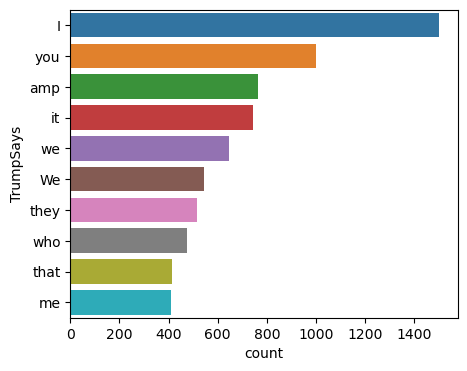

In [32]:
df_nouns = pd.DataFrame(items_of_interest, columns=['TrumpSays'])

plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpSays',
               data=df_nouns,
               order=df_nouns['TrumpSays'].value_counts().iloc[:10].index)
plt.show()

In [33]:
trump_topic = []
for token in doc:
    if (not token.is_stop) and \
        (token.pos_ == 'NOUN') and \
        (len(token.text) > 3):
        trump_topic.append(token.text)

In [34]:
print((', '.join(trump_topic))[0:2500])

approval, rating, time, stories, Media, villains, history, accomplishments, office, economy, economy, critics, recovery, @WashTimes, numbers, consumer, spending, time, millions, people, story, tens, thousands, abuse, surveillance, sympathies, respect, family, hearts, prayers, time, Congratulations, relationship, hour, people, government, Emails, disasters, news, story, tens, thousands, election, info, corruption, point, confidence, right, lifetime, appointments, pleasure, politics, command, position, gang, field, corruption, Collusion, attorney, record, client, meeting, answer, meeting, story, birthday, greats, StateDinner2018, tonight, solutions, secrecy, drug, prices, drug, pricing, patients, Congratulations, friends, today, support, people, people, future, Trading, relationship, meantime, regards, respect, Trading, stance, process, denuclearization, place, time, progress, respect, denuclearization, millions, people, ratings, People, censorship, contractor, months, jail, information,

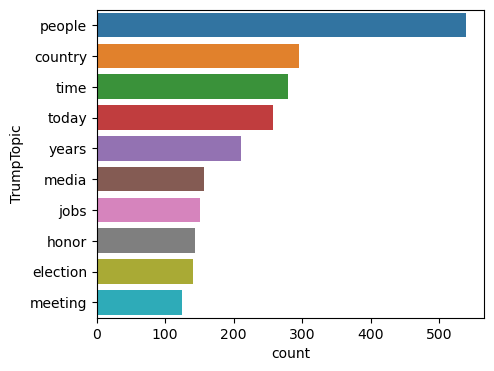

In [35]:
df_nouns = pd.DataFrame(trump_topic, columns=['TrumpTopic'])

plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpTopic',
              data=df_nouns,
              order=df_nouns['TrumpTopic'].value_counts().iloc[:10].index)
plt.show()

In [36]:
trump_ent = []
for ent in doc.ents:
    if ent.label_ not in ['PERCENT', 'DATE', 'TIME', 'CARDINAL']:
        trump_ent.append(ent.text)

In [37]:
print((', '.join(trump_ent))[0:2500])

the Republican Party, the Fake News Media, Obama, Trump, Trump, RT @realDonaldTrump, Social Media Giants, FBI, Christopher Steele &amp, Dossier, the Clinton Foundation, Department of Justice, Jeff, GREAT, John McCain, Mexico, Trade Agreement, Mexico, FBI, FBI, Hillary Clinton, FBI, Cabinet, Bob Mueller, Dems, Michaels Cohen, Trump, Trump Tower, the Fake News Media, Vince, Great #StateDinner2018, Ohio, Senate, Blueprint, House, American, AmericanPatientsFirst Congratulations, Australian, Scott Morrison, the United States, Australia, David Ige, Hawaii, Hawaii, State, The Federal Government, Hawaii, Ohio, Pompeo, North Korea, China, Kim, China, the UN Sanctions, State, Mike Pompeo, North Korea, Social Media Giants, Fake News, CNN, Hillary Clinton, Jeff, Christopher Steele &amp, Dossier, the Clinton Foundation, Trump Campaign, Russian, Dems, Jeff, Department of Justice, Jeff, GREAT, Comey, Mueller, McCabe, Strzok, Page, Election, U Target, @DRUDGE_REPORT, Polls, RT @DanScavino, @realDonald

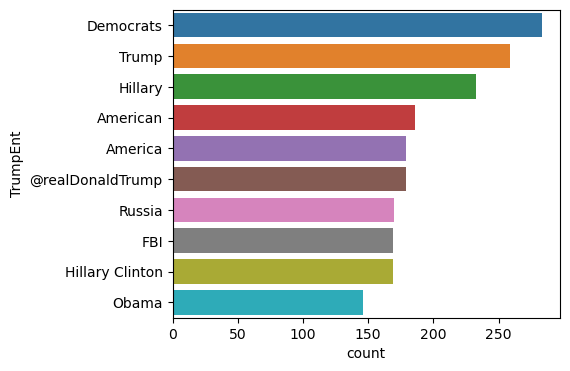

In [38]:
df_ent = pd.DataFrame(trump_ent, columns=['TrumpEnt'])
plt.figure(figsize=(5, 4))
sns.countplot(y='TrumpEnt',
              data=df_ent,
              order=df_ent['TrumpEnt'].value_counts().iloc[:10].index)
plt.show()

# Word Cloud

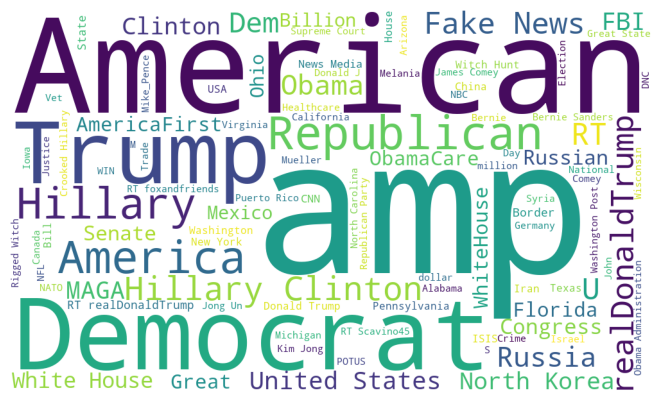

In [39]:
plt.figure(figsize=(10, 5))
wordcloud = WordCloud(width = 1000, height = 600, background_color='white',
                      stopwords=STOP_WORDS,
                      max_words=100,
                      # max_font_size=30,
                      random_state=42 
                      ).generate("\n".join(trump_ent))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [40]:
print(", ".join(trump_ent)[:2500])

the Republican Party, the Fake News Media, Obama, Trump, Trump, RT @realDonaldTrump, Social Media Giants, FBI, Christopher Steele &amp, Dossier, the Clinton Foundation, Department of Justice, Jeff, GREAT, John McCain, Mexico, Trade Agreement, Mexico, FBI, FBI, Hillary Clinton, FBI, Cabinet, Bob Mueller, Dems, Michaels Cohen, Trump, Trump Tower, the Fake News Media, Vince, Great #StateDinner2018, Ohio, Senate, Blueprint, House, American, AmericanPatientsFirst Congratulations, Australian, Scott Morrison, the United States, Australia, David Ige, Hawaii, Hawaii, State, The Federal Government, Hawaii, Ohio, Pompeo, North Korea, China, Kim, China, the UN Sanctions, State, Mike Pompeo, North Korea, Social Media Giants, Fake News, CNN, Hillary Clinton, Jeff, Christopher Steele &amp, Dossier, the Clinton Foundation, Trump Campaign, Russian, Dems, Jeff, Department of Justice, Jeff, GREAT, Comey, Mueller, McCabe, Strzok, Page, Election, U Target, @DRUDGE_REPORT, Polls, RT @DanScavino, @realDonald

# Matcher

In [41]:
# doc = nlp(text) - zdefiniowane wcześniej
matcher = Matcher(nlp.vocab)
matched_sents = [] # collect data of matched sentences to be visualized

def collect_sents(matcher, doc, i, matches, label='MATCH'):
    """
    Function to help reformat data for displacy visualization
    """
    match_id, start, end = matches[i]
    span = doc[start : end]  # matched span
    sent = span.sent  # sentence containing matched span
    
    # append mock entity for match in displaCy style to matched_sents
    
    if doc.vocab.strings[match_id] == 'DEMOCRATS':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
                   'end': span.end_char - sent.start_char,
                   'label': 'DEMOCRATS'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'RUSSIA':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'RUSSIA'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })
    elif doc.vocab.strings[match_id] == 'I':  # don't forget to get string!
        match_ents = [{'start': span.start_char - sent.start_char,
               'end': span.end_char - sent.start_char,
               'label': 'NARC'}]
        matched_sents.append({'text': sent.text, 'ents': match_ents })

In [42]:
russia_pattaern = [[{'LOWER': 'russia'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]] 
democrats_pattern = [[{'LOWER': 'democrats'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]]
i_pattern = [[{'LOWER': 'i'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'POS': 'ADJ'}]]

In [43]:
matcher.add('DEMOCRATS', democrats_pattern, on_match=collect_sents)
matcher.add('RUSSIA', russia_pattaern, on_match=collect_sents)
matcher.add('I', i_pattern, on_match=collect_sents)
matches = matcher(doc)

In [44]:
spacy.displacy.render(matched_sents, style='ent', jupyter=True, manual=True, 
                      options={'colors': {'NARC': '#6290c8', 'RUSSIA': '#cc2936', 'DEMOCRATS':'#f2cd5d'}})

# Parser

In [45]:
example_tweet = tweets.loc[180, 'text']
doc = nlp(example_tweet)

In [46]:
spacy.displacy.render(doc, jupyter=True, style='dep')

In [47]:
df_data = []
for token in doc:
    data = {
        'text': token.text,
        'dep': token.dep_,
        'pos': token.pos_,
        'head_text': token.head.text,
        'head_pos': token.head.pos_,
        'child': [child for child in token.children]
    }
    df_data.append(data)
pd.DataFrame(df_data)

,text,dep,pos,head_text,head_pos,child
0,Wacky,compound,PROPN,Omarosa,PROPN,[]
1,Omarosa,nsubj,PROPN,has,VERB,[Wacky]
2,already,advmod,ADV,has,VERB,[]
3,has,ROOT,VERB,has,VERB,"[Omarosa, already, Agreement, !]"
4,a,det,DET,Agreement,PROPN,[]
5,fully,advmod,ADV,signed,VERB,[]
6,signed,amod,VERB,Agreement,PROPN,[fully]
7,Non,compound,PROPN,Agreement,PROPN,[]
8,-,compound,PROPN,Agreement,PROPN,[]
9,Disclosure,compound,PROPN,Agreement,PROPN,[]


In [48]:
for s in doc.sents:
    print(s)

Wacky Omarosa already has a fully signed Non-Disclosure Agreement!


In [49]:
spacy_utils.get_subjects_of_verb(s.root)

[Omarosa]

In [50]:
spacy_utils.get_objects_of_verb(s.root)

[Agreement]

In [51]:
def ask_question(text: str):
    doc = nlp(text)

    for sentence in doc.sents:
        print(sentence.text)

        ask_about = spacy_utils.get_subjects_of_verb(sentence.root)
        answers = spacy_utils.get_objects_of_verb(sentence.root)
    
        if ask_about and answers:
            if sentence.root.lemma_ == "be":
                quection = f"What {sentence.root} {ask_about[0]}?"
            else:
                question = f"What does {ask_about[0]} {sentence.root.lemma_}?"
            print(question)
            print(f"Answer: {answers[0]}")
        else:
            print("...")

In [52]:
ask_question(example_tweet)

Wacky Omarosa already has a fully signed Non-Disclosure Agreement!
What does Omarosa have?
Answer: Agreement
